In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_context('talk')
np.set_printoptions(suppress=True) 
    ### not xEyy format(science float format)
%matplotlib inline  

In [2]:
import scipy.io
data = scipy.io.loadmat('ex8data1.mat')
print data.keys()

['yval', '__header__', '__globals__', 'Xval', 'X', '__version__']


In [3]:
X = data['X']
Xval = data['Xval']
yval = data['yval']

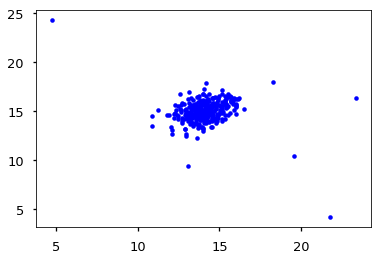

In [4]:
plt.plot(X[:, 0], X[:, 1], 'b.');
# plt.scatter(X[:, 0], X[:, 1], marker='.');

In [5]:
def estimateGassian(X):
    m, n = X.shape
    mu = X.mean(axis=0).reshape(1,-1)
    sigma2 = 1.0/m * np.sum((X-mu)**2, axis=0).reshape(1,-1)
    return mu, sigma2

In [6]:
mu, sigma2 = estimateGassian(X)
print mu             ### 14.112, 14.998
print sigma2         ### 1.8326, 1.7097

[[14.11222578 14.99771051]]
[[1.83263141 1.70974533]]


$$p(x;\mu,\sigma^2)=
\frac{1}{\sqrt{2\pi\sigma^2}}
e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

$$p(x)=
\frac{1}{ (2\pi)^{\frac{n}{2}} |\Sigma|^{1/2}}
exp(-(1/2) (x-\mu)^T \Sigma^{-1} (x-\mu) )
$$

In [7]:
def multivariateGaussian(X, mu, Sigma2):
    k = mu.shape[1]

    if Sigma2.shape[0] == 1 or Sigma2.shape[1]==1:
        Sigma2 = Sigma2.flatten()
        Sigma2 = np.diag(Sigma2)

    X =  X - mu
    p1 = np.linalg.det(Sigma2)**(-0.5)
    p2 = np.dot(X, np.linalg.pinv(Sigma2))
    p3 = np.sum(p2*X, axis=1)
    p4 = np.exp(-0.5*p3).reshape(-1,1)
#     print p1
#     print k
#     print (2.0*np.pi) ** (-k/2.0)
#     print ((2.0*np.pi) ** (-k/2.0) * p1)
    p = ((2.0*np.pi) ** (-k/2.0) * p1) * p4
    return p.reshape(-1,1)

In [8]:
p = multivariateGaussian(X, mu, sigma2.reshape(1,-1))
print p[:5]
### 0.064708
### 0.050304
### 0.072450
### 0.050316
### 0.063685

[[0.06470829]
 [0.05030417]
 [0.07245035]
 [0.05031575]
 [0.06368497]]


In [9]:
def visualizeFit(X, mu, sigma2):
    plt.plot(X[:, 0], X[:, 1], 'b.');
    X1 = np.arange(0, 35, 0.5)
    X2 = np.arange(0, 35, 0.5)
    XX = np.zeros([len(X1)*len(X2), 2])
    for i in xrange(len(X1)):
        for j in xrange(len(X2)):
            XX[i*len(X2)+j] = np.array([X1[i], X2[j]])
    Z = multivariateGaussian(XX, mu, sigma2)
    Z = Z.reshape(len(X1), -1)
    plt.contour(X1, X2, Z, 10**np.arange(-20.,0.,3.),
                colors='r', linewidths=1);

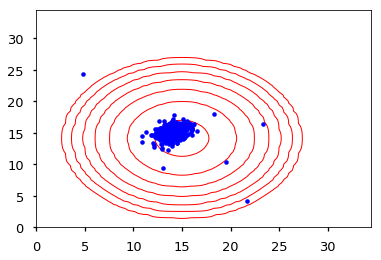

In [10]:
visualizeFit(X, mu, sigma2);

In [11]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [12]:
#####################################################
##
## Part3, Find Outliers
##

def selectThreshold(yval, pval):
    bestEpsilon = 0.
    bestF1 = 0.;
    stepsize = (np.max(pval) - np.min(pval))/1000
    for epsilon in np.arange(np.min(pval), 
                             np.max(pval)+stepsize, stepsize):
        pred = (pval<epsilon).astype('int')
        tp = np.sum((yval[pred==1]==1).astype('int'))
        fp = np.sum((yval[pred==1]==0).astype('int'))
        fn = np.sum((yval[pred==0]==1).astype('int'))
        if (tp+fp) == 0:
            prec = 0.0
        else:
            prec = tp*1.0/(tp+fp)
        if (tp+fn) == 0:
            rec = 0.0
        else:
            rec  = tp*1.0/(tp+fn)
        if (prec+rec) == 0:
            F1 = 0.0
        else:
            F1 = 2*prec*rec /(prec+rec)
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon
    return bestEpsilon, bestF1

In [13]:
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)
print '%e'%epsilon   ### 8.99e-05
print F1             ### 0.875000

8.990853e-05
0.8750000000000001


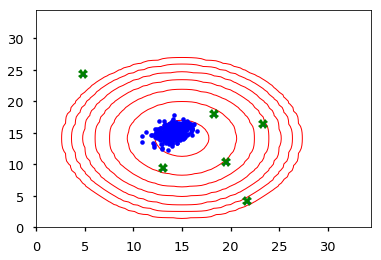

In [14]:
outliers = np.where(p < epsilon)[0]
visualizeFit(X, mu, sigma2);
plt.plot(X[outliers,0], X[outliers, 1], 'gX');

In [15]:
outliers

array([300, 301, 303, 304, 305, 306], dtype=int64)

In [16]:
import scipy.io
data = scipy.io.loadmat('ex8data2.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval']

In [17]:
mu, sigma2 = estimateGassian(X)
p = multivariateGaussian(X, mu, sigma2)
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)
print epsilon                              ### 1.38e-18
print F1                                   ### 0.615385
print np.sum((p<epsilon).astype('int'))    ### 117

1.377228890761358e-18
0.6153846153846154
117


### Recommender Systems

In [18]:
data = scipy.io.loadmat('ex8_movies.mat')
print data.keys()

['Y', 'R', '__version__', '__header__', '__globals__']


In [47]:
Y = data['Y']
R = data['R']
print Y.shape

(1682L, 943L)


In [43]:
print 'Average rating for movie 1(Toy Story):',
print np.mean(Y[0, R[0]==1])   ### 3.878319

Average rating for movie 1(Toy Story): 3.8783185840707963


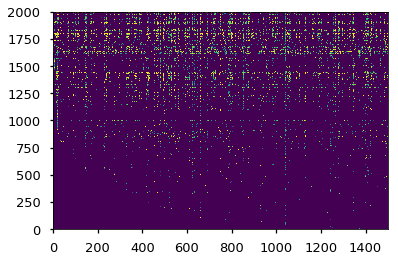

In [49]:
plt.imshow(Y, extent=[0, 1500, 0, 2000], aspect='auto');

In [52]:
data = scipy.io.loadmat('ex8_movieParams.mat')
print data.keys()

['num_features', '__header__', '__globals__', 'num_users', 'X', 'Theta', '__version__', 'num_movies']


In [53]:
num_features = data['num_features']
num_users = data['num_users']
num_movies = data['num_movies']
X = data['X']
Theta = data['Theta']

In [64]:
print 'num_features =', num_features[0][0]
print 'num_users    =', num_users[0][0]
print 'num_movies   =', num_movies[0][0]
print 'X.shape      =', X.shape
print 'Theta.shape  =', Theta.shape

num_features = 10
num_users    = 943
num_movies   = 1682
X.shape      = (1682L, 10L)
Theta.shape  = (943L, 10L)


In [65]:
### Reduce the dataset
num_features = 3
num_users    = 4
num_movies   = 5
X = X[0:num_movies, 0:num_features]
Theta = Theta[0:num_users, 0:num_features]
Y = Y[:num_movies, :num_users]
R = R[:num_movies, :num_users]

In [66]:
X

array([[ 1.0486855 , -0.40023196,  1.19411945],
       [ 0.78085123, -0.38562591,  0.52119779],
       [ 0.64150886, -0.54785385, -0.08379638],
       [ 0.45361782, -0.80021844,  0.68048129],
       [ 0.93753789,  0.1060899 ,  0.36195295]])

In [67]:
Theta

array([[ 0.28544362, -1.68426509,  0.26293877],
       [ 0.50501321, -0.45464846,  0.31746244],
       [-0.43191656, -0.47880449,  0.84671111],
       [ 0.72859839, -0.27189391,  0.3268436 ]])

In [99]:
delta2 = 0

### Collaborative filtering

$$J = \frac{1}{2} 
\sum_{(i,j):r(i,j)=1}{}
(\theta^T X-Y)
$$

$$
\frac{\partial J}{\partial X} =
\sum_{r(i,j)=1}((\theta^T X - Y) \theta)
$$

$$
\frac{\partial J}{\partial\theta} = 
\sum_{r(i,j)=1}((\theta^T X - Y) X )
$$

In [250]:
def cofiGradFunc(params, *args):
    (Y, R, 
     num_users, num_movies, num_features,
     lamb) = args
    X = params[:num_movies*num_features].reshape(num_movies, 
                                                 num_features)
    Theta = params[num_movies*num_features:].reshape(num_users, 
                                                     num_features)
    
    delta = (np.dot(X, Theta.T)-Y)
    delta[R==0] = 0
    X_grad = np.dot(delta, Theta)
    Theta_grad = np.dot(delta.T, X)
    X_grad += lamb*X
    Theta_grad += lamb*Theta
    grad = np.append(X_grad, Theta_grad)
    return grad
    
def cofiCostFunc(params, *args):
    (Y, R, 
     num_users, num_movies, num_features,
     lamb) = args
    X = params[:num_movies*num_features].reshape(num_movies, 
                                                 num_features)
    Theta = params[num_movies*num_features:].reshape(num_users, 
                                                     num_features)
    delta2 = (np.dot(X, Theta.T)-Y)**2
    J = 0.5*np.sum(delta2[R==1])
    J = J + lamb/2.0* np.sum(Theta**2) + lamb/2.0* np.sum(X**2)
    return J

In [251]:
params = np.append(X, Theta)
J = cofiCostFunc(params, Y, R, 
                 num_users, num_movies, num_features, 0)
print J    ### 22.22

22.22460372568567


In [252]:
def computeNumericalGradient(Jfunc, theta, *args):
    numgrad = np.zeros(theta.shape)
    perturb = np.zeros(theta.shape)
    e = 1e-4
    for p in xrange(theta.size):
        perturb[p] = e
        loss1 = Jfunc(theta-perturb, *args)
        loss2 = Jfunc(theta+perturb, *args)
        numgrad[p] = (loss2-loss1)/(2*e)
        perturb[p] = 0
    return numgrad

def checkCostFunction(lamb=0, disp=False):
    X_t = np.random.rand(4, 3)
    Theta_t = np.random.rand(5, 3)
    Y = np.dot(X_t, Theta_t.T)
    R = np.zeros(Y.shape)
    R[Y!=0] = 1
    
    X = np.random.randn(X_t.size)
    Theta = np.random.randn(Theta_t.size)
    num_users = Y.shape[1]
    num_movies = Y.shape[0]
    num_features = Theta_t.shape[1]
    
    params = np.append(X, Theta)
    numgrad = computeNumericalGradient(cofiCostFunc, params, 
                                       Y, R, num_users,
                                       num_movies, num_features,
                                       lamb)
    grad = cofiGradFunc(params, Y, R, 
                        num_users, num_movies, num_features, 
                        lamb)
    numgrad = numgrad.reshape(-1,1)
    grad = grad.reshape(-1,1)
    if disp:
        print np.append(numgrad, grad, axis=1)
    diff =  np.linalg.norm(numgrad-grad)/np.linalg.norm(numgrad+grad)
    print 
    print 'If your cost function implementation is correct, then'
    print 'The relative difference will be small, less than 1e-9'
    print 'Relative Difference: %g'%diff

In [253]:
checkCostFunction(disp = True)

[[  0.89055299   0.89055299]
 [  3.98180405   3.98180405]
 [ -4.10854478  -4.10854478]
 [ -3.96701377  -3.96701377]
 [ -7.62534881  -7.62534881]
 [ -1.90635895  -1.90635895]
 [ -1.39305812  -1.39305812]
 [ -3.28052135  -3.28052135]
 [ -1.34155914  -1.34155914]
 [  4.51616268   4.51616268]
 [  9.8610756    9.8610756 ]
 [  3.97964749   3.97964749]
 [ -0.2360285   -0.2360285 ]
 [  5.80188132   5.80188132]
 [  0.41775875   0.41775875]
 [  1.87237456   1.87237456]
 [-10.48759427 -10.48759427]
 [  2.15406171   2.15406171]
 [  2.74585343   2.74585343]
 [ -0.98624848  -0.98624848]
 [  2.77629911   2.77629911]
 [  1.79953103   1.79953103]
 [ -6.04135484  -6.04135484]
 [  1.83288314   1.83288314]
 [ -1.01883649  -1.01883649]
 [ -0.5720995   -0.5720995 ]
 [ -0.99003752  -0.99003752]]

If your cost function implementation is correct, then
The relative difference will be small, less than 1e-9
Relative Difference: 1.64452e-12


In [254]:
params = np.append(X, Theta)
J = cofiCostFunc(params, Y, R, 
                 num_users, num_movies, num_features, 1.5)
print J    ### 31.34

31.344056244274213


In [256]:
checkCostFunction(1.5, disp=True)

[[ -3.37274956  -3.37274956]
 [ -2.1311369   -2.1311369 ]
 [ -4.23303417  -4.23303417]
 [ -0.86466246  -0.86466246]
 [ -4.18911005  -4.18911005]
 [ -0.93055585  -0.93055585]
 [ 23.8379924   23.8379924 ]
 [ 20.97959561  20.97959561]
 [  2.34042615   2.34042615]
 [  5.59289164   5.59289164]
 [  1.66299645   1.66299645]
 [  5.34977384   5.34977384]
 [  7.56033948   7.56033948]
 [ 12.64413337  12.64413337]
 [ -5.13902488  -5.13902488]
 [  3.14872109   3.14872109]
 [  3.59845121   3.59845121]
 [  1.70970742   1.70970742]
 [  9.56243441   9.56243441]
 [  7.25009381   7.25009381]
 [  1.56274685   1.56274685]
 [ -9.79077987  -9.79077987]
 [ -9.07560484  -9.07560484]
 [  1.82249631   1.82249631]
 [-18.21088707 -18.21088707]
 [-20.87276877 -20.87276877]
 [ -0.08874057  -0.08874057]]

If your cost function implementation is correct, then
The relative difference will be small, less than 1e-9
Relative Difference: 2.87125e-12
